In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# re - regular expression
import tweepy, re
from textblob import TextBlob

#### Authentication

In [59]:
# You first need to create developers account. Link - https://developer.twitter.com/en/apply-for-access

#After creating account, you will need to create app. Then you'll get consumerKey(also known as API key), consumerSecret(also known as API Secret), accessToken & accessTokenSecret.
#Fill the following information accordingly

consumerKey = "EnterConsumerKeyAsStatedAbove"
consumerSecret = "EnterConsumerSecretAsStatedAbove"
accessToken = "EnterAccessTokenAsStatedAbove"
accessTokenSecret = "EnterAccessTokenSecretAsStatedAbove"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

### Retrieving Tweets

In [60]:
# Input for term to be searched and how any tweets to search
searchTerm = input("Enter Keyword/tag to search about : ")
NoOfTerms = int(input("Enter how many tweets to search"))

tweets = []
tweetText = []

#Searching for Tweets
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang="en").items(NoOfTerms)

Enter Keyword/tag to search about : Olympics
Enter how many tweets to search500


In [61]:
# Extract Text from Extracted Tweets & Change it into Database

tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,@forcefemmed Modern pentathlon easy it's all j...
1,@AggieUp @espn I own Wyoming. I won 4 gold med...
2,@Newsweek_JAPAN “The Summer Olympics are simpl...
3,@AlexScott Brilliant interview with @JenGadiro...
4,🚨AAU Junior Olympics Medalist🚨\n\nCongratulati...
...,...
495,@TerriJRickman @fresssshhhh @SportsCenter Bull...
496,See yall at 0230 #TeamBotswana #Olympics #Athl...
497,"No, @latimes. @gigifernandez CHOSE to DENOUNCE..."
498,Bullseye #Shooting World Ranking \n1 #ROC 2722...


### Cleaning Data

In [62]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df["Cleaned Data "] = tweet_df[0].apply(clean_data)

In [63]:
tweet_df.head()

,0,Cleaned Data
0,@forcefemmed Modern pentathlon easy it's all j...,Modern pentathlon easy it s all just rich unat...
1,@AggieUp @espn I own Wyoming. I won 4 gold med...,I own Wyoming I won 4 gold medals in the Cub S...
2,@Newsweek_JAPAN “The Summer Olympics are simpl...,JAPAN The Summer Olympics are simply of less v...
3,@AlexScott Brilliant interview with @JenGadiro...,Brilliant interview with amp Olympics Gymnastics
4,🚨AAU Junior Olympics Medalist🚨\n\nCongratulati...,AAU Junior Olympics Medalist Congratulations M...


In [64]:
# Removing Numbers from text

def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df["Cleaned Data "] = tweet_df["Cleaned Data "].apply(drop_numbers)

In [65]:
tweet_df.head()

,0,Cleaned Data
0,@forcefemmed Modern pentathlon easy it's all j...,Modern pentathlon easy it s all just rich unat...
1,@AggieUp @espn I own Wyoming. I won 4 gold med...,I own Wyoming I won gold medals in the Cub Sc...
2,@Newsweek_JAPAN “The Summer Olympics are simpl...,JAPAN The Summer Olympics are simply of less v...
3,@AlexScott Brilliant interview with @JenGadiro...,Brilliant interview with amp Olympics Gymnastics
4,🚨AAU Junior Olympics Medalist🚨\n\nCongratulati...,AAU Junior Olympics Medalist Congratulations M...


In [66]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
# Converting text to lower case

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df["Cleaned Data "] = tweet_df["Cleaned Data "].apply(lower_case)

In [68]:
tweet_df.head()

,0,Cleaned Data
0,@forcefemmed Modern pentathlon easy it's all j...,modern pentathlon easy it s all just rich unat...
1,@AggieUp @espn I own Wyoming. I won 4 gold med...,i own wyoming i won gold medals in the cub sco...
2,@Newsweek_JAPAN “The Summer Olympics are simpl...,japan the summer olympics are simply of less v...
3,@AlexScott Brilliant interview with @JenGadiro...,brilliant interview with amp olympics gymnastics
4,🚨AAU Junior Olympics Medalist🚨\n\nCongratulati...,aau junior olympics medalist congratulations m...


In [69]:
tweet_df["Cleaned Data "].values

array(['modern pentathlon easy it s all just rich unathletic kids that kinda wanted to go to the olympics so t',
       'i own wyoming i won gold medals in the cub scout olympics in wyoming',
       'japan the summer olympics are simply of less value if held in october because of pre existing program co',
       'brilliant interview with amp olympics gymnastics',
       'aau junior olympics medalist congratulations milena chevallier on her th place finish in the high jump clearing',
       'in of rw pagan account scenarios the typical reply would have been about how this is proof that communism is an',
       'newp she s a cant',
       'tom daley is knitting his way through the tokyo olympics olympics',
       'canada s earl thompson pictured won the m hurdles at the at the olympics in antwerp in the high jump on',
       'not gon na lie the coverage of the olympics is making me want to take a trip to tokyo',
       'another athlete that is seeking asylum after participating in the ol

### Lemmatization
##### Lemmatization is the process of converting a word to its base form. It considers the context and converts the word to its meaningful base form i.e. better is converted to its base form which is --> good

In [70]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df["Cleaned Data "] = tweet_df["Cleaned Data "].apply(lemmatise)

In [72]:
tweet_df.head()

,0,Cleaned Data
0,@forcefemmed Modern pentathlon easy it's all j...,modern pentathlon easy it s all just rich unat...
1,@AggieUp @espn I own Wyoming. I won 4 gold med...,i own wyoming i won gold medal in the cub scou...
2,@Newsweek_JAPAN “The Summer Olympics are simpl...,japan the summer olympics are simply of le val...
3,@AlexScott Brilliant interview with @JenGadiro...,brilliant interview with amp olympics gymnastics
4,🚨AAU Junior Olympics Medalist🚨\n\nCongratulati...,aau junior olympics medalist congratulation mi...


In [73]:
tweet_df["Cleaned Data "].values

array(['modern pentathlon easy it s all just rich unathletic kid that kinda wanted to go to the olympics so t',
       'i own wyoming i won gold medal in the cub scout olympics in wyoming',
       'japan the summer olympics are simply of le value if held in october because of pre existing program co',
       'brilliant interview with amp olympics gymnastics',
       'aau junior olympics medalist congratulation milena chevallier on her th place finish in the high jump clearing',
       'in of rw pagan account scenario the typical reply would have been about how this is proof that communism is an',
       'newp she s a cant',
       'tom daley is knitting his way through the tokyo olympics olympics',
       'canada s earl thompson pictured won the m hurdle at the at the olympics in antwerp in the high jump on',
       'not gon na lie the coverage of the olympics is making me want to take a trip to tokyo',
       'another athlete that is seeking asylum after participating in the olympics 

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
# Removing Stop words (Words that don't add value to the sentence. For example - the, he, she, is, etc)

def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df["Cleaned Data "] = tweet_df["Cleaned Data "].apply(remove_stopword)

In [76]:
tweet_df.head()

,0,Cleaned Data
0,@forcefemmed Modern pentathlon easy it's all j...,modern pentathlon easy rich unathletic kid kin...
1,@AggieUp @espn I own Wyoming. I won 4 gold med...,wyoming gold medal cub scout olympics wyoming
2,@Newsweek_JAPAN “The Summer Olympics are simpl...,japan summer olympics simply le value held oct...
3,@AlexScott Brilliant interview with @JenGadiro...,brilliant interview amp olympics gymnastics
4,🚨AAU Junior Olympics Medalist🚨\n\nCongratulati...,aau junior olympics medalist congratulation mi...


In [77]:
tweet_df["Cleaned Data "].values

array(['modern pentathlon easy rich unathletic kid kinda wanted go olympics',
       'wyoming gold medal cub scout olympics wyoming',
       'japan summer olympics simply le value held october pre existing program co',
       'brilliant interview amp olympics gymnastics',
       'aau junior olympics medalist congratulation milena chevallier th place finish high jump clearing',
       'rw pagan account scenario typical reply would proof communism',
       'newp cant', 'tom daley knitting way tokyo olympics olympics',
       'canada earl thompson pictured hurdle olympics antwerp high jump',
       'gon na lie coverage olympics making want take trip tokyo',
       'another athlete seeking asylum participating olympics last week venezuelan boxer eldric sel',
       'man strong kg lb calculation twice weight',
       'people comment realize olympics policy require trans athlete test',
       'everybody even olympian turning fredo corleone eye wtf ultimate slap',
       'really suck would st

#### Now our data is cleaned, we can proceed further

### Sentiment Analyzer Engine
##### We'll use sentiment() function in textBlob which returns Polarity and Subjectivity. Polarity is the expression which determines the sentimental aspect of an opinion. It can be determined as Positive, Negative or Neutral. It lies between -1 to +1 where +1 --> Positive Sentiment, -1 --> Negative Sentiment and 0 means Neutral Sentiment.

In [78]:
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df["Polarity"] = tweet_df["Cleaned Data "].apply(get_polarity)

In [79]:
tweet_df["Polarity"].value_counts()

Neutral              203
Weakly Positive       89
Positive              76
Weakly Negative       52
Strongly Positive     42
Negative              31
Strongly Negative      6
Name: Polarity, dtype: int64

In [80]:
tweet_df.head(20)

,0,Cleaned Data,Polarity
0,@forcefemmed Modern pentathlon easy it's all j...,modern pentathlon easy rich unathletic kid kin...,Positive
1,@AggieUp @espn I own Wyoming. I won 4 gold med...,wyoming gold medal cub scout olympics wyoming,Neutral
2,@Newsweek_JAPAN “The Summer Olympics are simpl...,japan summer olympics simply le value held oct...,Neutral
3,@AlexScott Brilliant interview with @JenGadiro...,brilliant interview amp olympics gymnastics,Strongly Positive
4,🚨AAU Junior Olympics Medalist🚨\n\nCongratulati...,aau junior olympics medalist congratulation mi...,Weakly Positive
5,In 90% of RW pagan Account scenarios the typic...,rw pagan account scenario typical reply would ...,Weakly Negative
6,@NightsNoirs @Olympics @TeamUSA Newp. She’s a ...,newp cant,Neutral
7,Tom Daley Is Knitting His Way Through The Toky...,tom daley knitting way tokyo olympics olympics,Neutral
8,Canada's Earl Thompson (pictured) won the 100m...,canada earl thompson pictured hurdle olympics ...,Weakly Positive
9,Not gonna lie the coverage of the Olympics is ...,gon na lie coverage olympics making want take ...,Neutral


In [81]:
# Finding Average Reaction of the people by calculating total number of all 7 categories of sentiment. We'll also find the total polarity of all the tweets.

polarity = 0
neutral = 0
wpos = 0
pos = 0
spos = 0
wneg = 0
neg = 0
sneg = 0

for i in range(0,NoOfTerms):
    textblob = TextBlob(str(tweet_df["Cleaned Data "][i]))
    polarity += textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if(pol==0):
        neutral+=1
    elif(pol>0 and pol<=0.3):
        wpos+=1
    elif(pol>0.3 and pol<=0.6):
        pos+=1
    elif(pol>0.6 and pol<=1):
        spos+=1
    elif(pol>-0.3 and pol<0):
        wneg+=1
    elif(pol>-0.6 and pol<=-0.3):
        neg+=1
    elif(pol>-1 and pol<=-0.6):
        sneg+=1
        

#Finding Average reaction
polarity = polarity/NoOfTerms
print(polarity)

0.11336208178726041


In [82]:
# Percentage of people reacting

def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [83]:
# Calculating Percentage
pos = percentage(pos, NoOfTerms)
wpos = percentage(wpos, NoOfTerms)
spos = percentage(spos, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)
neg = percentage(neg, NoOfTerms)
sneg = percentage(sneg, NoOfTerms)
wneg = percentage(wneg, NoOfTerms)

neutral

'40.60'

### Displaying Result

In [84]:
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(pos) + "% people thought it was positive")
print(str(wpos) + "% people thought it was weakly positive")
print(str(spos) + "% people thought it was strongly positive")
print(str(neg) + "% people thought it was negative")
print(str(wneg) + "% people thought it was weakly negative")
print(str(sneg) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on Olympics by analyzing 500 tweets.

-----------------------------------------------------------------------------------------

General Report: 

------------------------------------------------------------------------------------------

Detailed Report: 
15.20% people thought it was positive
17.80% people thought it was weakly positive
8.40% people thought it was strongly positive
6.20% people thought it was negative
10.40% people thought it was weakly negative
1.20% people thought it was strongly negative
40.60% people thought it was neutral


### Visualizing Results

In [85]:
sizes = [pos, wpos, spos, neutral, neg, wneg, sneg]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(pos) + '%]', 'Weakly Positive [' + str(wpos) + '%]',
          'Strongly Positive [' + str(spos) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(neg) + '%]', 'Weakly Negative [' + str(wneg) + '%]', 
          'Strongly Negative [' + str(sneg) + '%]']

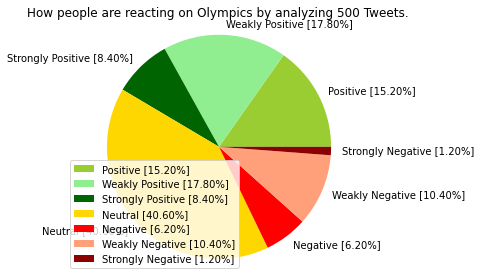

In [86]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()